In [25]:
import pyspark
import pandas
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
spark = SparkSession.builder \
  .appName('control table creation') \
  .getOrCreate()

In [26]:
covid_df = pandas.read_excel('/home/aaron/Downloads/covid.xls',inferSchema='')

sdf = spark.createDataFrame(covid_df)

#print(excel_data_df)

TypeError: field Gaul1Nuts1: Can not merge type <class 'pyspark.sql.types.DoubleType'> and <class 'pyspark.sql.types.StringType'>

In [27]:
#excel_data_df.plot(kind='bar',x='DateRep',y='CountryExp')

#covid_df.groupby('CountryExp')['DateRep'].nunique().plot(kind='bar')
#excel_data_df.show()

covid_df

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-16,Afghanistan,6,0.0,AF,NaN,Non-EU/EEA
1,2020-03-15,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
2,2020-03-11,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
3,2020-03-08,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
4,2020-03-02,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
5245,2020-01-04,Vietnam,0,0.0,VN,NaN,Non-EU/EEA
5246,2020-01-03,Vietnam,0,0.0,VN,NaN,Non-EU/EEA
5247,2020-01-02,Vietnam,0,0.0,VN,NaN,Non-EU/EEA
5248,2020-01-01,Vietnam,0,0.0,VN,NaN,Non-EU/EEA


In [17]:
uniqueValues = covid_df['CountryExp'].unique()
 
print('Unique elements in column "Country" ')
print(uniqueValues)

Unique elements in column "Country" 
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada'
 'Cases on an international conveyance Japan' 'Central African Republic'
 'Chile' 'China' 'Colombia' 'Congo' 'Costa Rica' 'Cote dIvoire' 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Czech republic'
 'Democratic Republic of the Congo' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'Equatorial Guinea' 'Estonia' 'Ethiopia' 'Finland'
 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Latvia' 'Lebanon'
 'Liechtenstein' 'Lithuania' 'Luxembourg'

In [18]:
uniqueValues = covid_df.nunique()
 
print('Count of unique value sin each column :')
print(uniqueValues)

Count of unique value sin each column :
DateRep          77
CountryExp      143
NewConfCases    243
NewDeaths        75
GeoId           139
Gaul1Nuts1       10
EU                7
dtype: int64


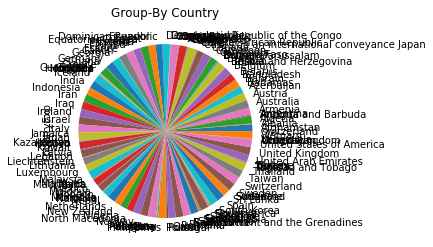

In [20]:
covid_df.groupby('CountryExp')['CountryExp'].agg('count').plot(kind='pie',title='Group-By Country')

In [39]:
covid_df.groupby('CountryExp').plot(x='DateRep', y='CountryExp')

#covid_df.groupby('CountryExp').plot(x='DateRep', y='CountryExp', ax=ax, legend=False)

KeyError: 'CountryExp'

In [44]:
covid_df.sort_values("CountryExp", inplace = True) 

In [45]:
filter1 = covid_df["CountryExp"]=="Italy"

In [46]:
filter2 = covid_df["NewConfCases"]>0

In [47]:
covid_df.where(filter1 & filter2, inplace = True)

In [53]:
covid_df

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
2560,1.584317e+18,Italy,6230.0,370.0,IT,NaN,EU
2582,1.582416e+18,Italy,62.0,2.0,IT,NaN,EU
2581,1.582502e+18,Italy,53.0,0.0,IT,NaN,EU
2580,1.582589e+18,Italy,97.0,4.0,IT,NaN,EU
2579,1.582675e+18,Italy,93.0,5.0,IT,NaN,EU
...,...,...,...,...,...,...,...
5245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5248,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
covid1 = covid_df.dropna()

In [57]:
covid1

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
